<a href="https://colab.research.google.com/github/hariskhan-hk/Churn_pred/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [56]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [57]:
tel_df = pd.read_csv('/content/Cleaned_Telecom_Dataset.csv', index_col = 0)
tel_df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


# Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [59]:
scaler.fit(tel_df.drop(['Churn'],axis = 1))
scaled_features = scaler.transform(tel_df.drop('Churn',axis = 1))

# Feature Selection

In [60]:
X = tel_df.drop('Churn', axis = 1)
y = tel_df['Churn']

# Train Test Split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 42)

# With Python Package

In [62]:
model_dt = DecisionTreeClassifier(criterion = "entropy",random_state = 42,max_depth=6, min_samples_leaf=8)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       random_state=42)

In [63]:
y_pred= model_dt.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [64]:
model_dt.score(X_test,y_test)

0.7683013503909026

In [65]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.56      0.59      0.57       374

    accuracy                           0.77      1407
   macro avg       0.70      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



In [66]:
confusion_matrix_dt = confusion_matrix(y_test, y_pred)
confusion_matrix_dt

array([[861, 172],
       [154, 220]])

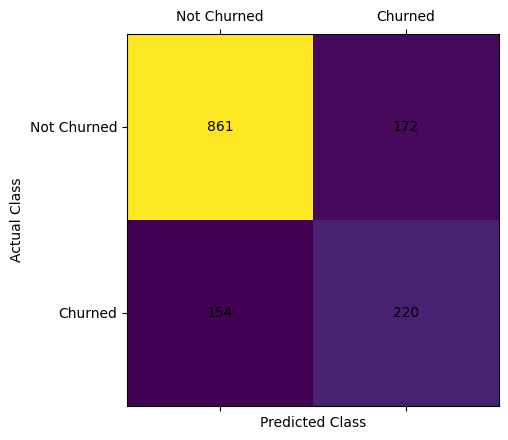

In [67]:
# create a heatmap of the matrix using matshow()
import matplotlib.pyplot as plt

plt.matshow(confusion_matrix_dt)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_dt[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [68]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [69]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [70]:
model_dt_smote=DecisionTreeClassifier(criterion = "entropy",random_state = 42,max_depth=6, min_samples_leaf=8)

In [71]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9398625429553265
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       545
           1       0.92      0.97      0.95       619

    accuracy                           0.94      1164
   macro avg       0.94      0.94      0.94      1164
weighted avg       0.94      0.94      0.94      1164



In [72]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[492  53]
 [ 17 602]]


Now we can see quite better results, i.e. Accuracy: 92 %, and a very good recall, precision & f1 score for minority class.